# Behavioral Cloning (BC): Experiments Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir('/home/mohsen/projects/cs285/homework_fall2022/hw1/')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = '150'

In [5]:
exp_path = 'tune_exps/'

In [6]:
cat_hyper_params = ['batch_size', 'n_layers', 'size', 
                    'train_batch_size', 
                    'num_agent_train_steps_per_iter']
cont_hyper_params = ['learning_rate']

## Ant v4 Experiment Hyper-parameter optimization analysis

In [7]:
ant_experiments = [folder for folder in os.listdir(exp_path) if folder.startswith('q1_tune_ant')]

In [8]:
len(ant_experiments)

177

In [9]:
import json

In [10]:
from tqdm import tqdm

In [11]:
df = None
for experiment in tqdm(sorted(ant_experiments)):
    try:
        progress_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
        if len(progress_df) >= 1:
            # print(experiment)
            progress_df['id'] = experiment
            
            params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'r'))
            if params['eval_batch_size'] != 10000 and params['ep_len'] != 1024: 
                continue
            
            for key, value in params.items():
                if key not in ['agent_params', 'env_kwargs']:
                    progress_df[key] = value
                else:
                    for key2, value2 in params[key].items():
                        progress_df[key2] = value2
            
            if df is None:
                df = progress_df.copy()
            else:
                df = pd.concat([df, progress_df], axis=0)
        else:
            continue
    except:
        continue
    

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 177/177 [00:01<00:00, 135.00it/s]


In [12]:
df.head()

,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,...,which_gpu,max_replay_buffer_size,save_params,seed,logdir,discrete,ac_dim,ob_dim,render_mode,use_contact_forces
0,-452.96270,773.97570,-37.232380,-2645.0254,183.965517,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1046,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,-366.02660,503.94922,-6.641037,-1474.8439,329.406250,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1499,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,3672.11500,743.07630,4256.860400,2137.4382,968.454545,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1075,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,-555.20166,922.68000,-21.069480,-2647.7788,217.978261,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,524,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True
0,-512.62920,792.43200,-14.329021,-2507.3180,224.148936,4713.6533,12.196533,4725.8496,4701.4565,1000.0,...,0,1000000,False,1480,/home/mohsen/projects/cs285/homework_fall2022/...,False,8,111,None,True


In [13]:
df.shape

(176, 42)

In [14]:
df['Training Loss'].describe()

count    176.000000
mean       0.096329
std        0.928437
min       -2.503112
25%       -0.591918
50%        0.563623
75%        0.812817
max        0.958295
Name: Training Loss, dtype: float64

/tmp/ipykernel_3207270/908142596.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.displot(data=df, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/908142596.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(data=df, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/908142596.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(data=df, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/908142596.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.displot(data=df, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/908142596.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.displot(data=df, x='Training Loss', hue=feature,


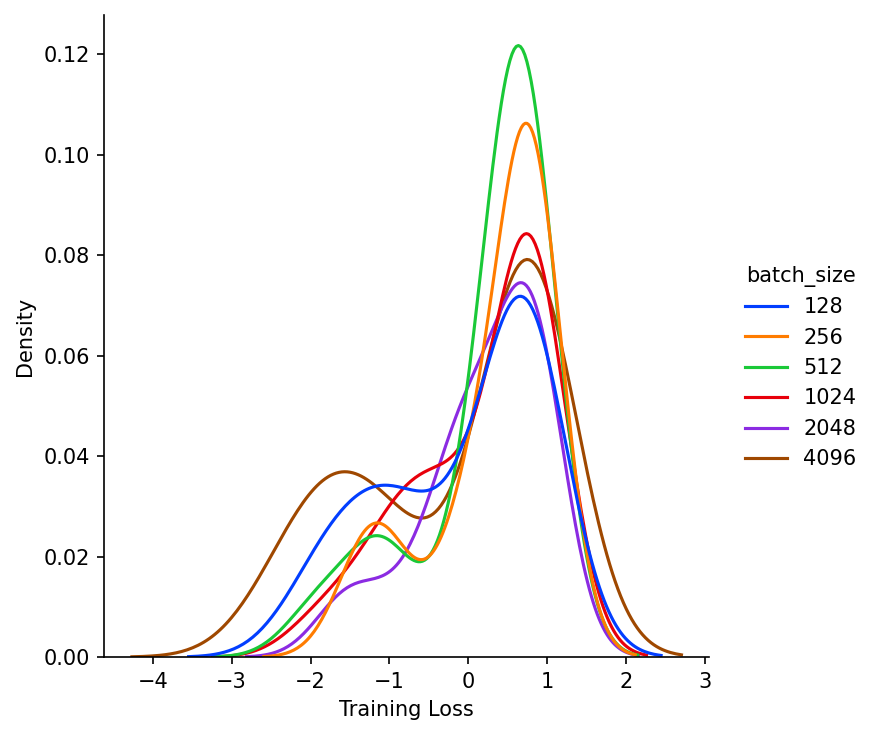

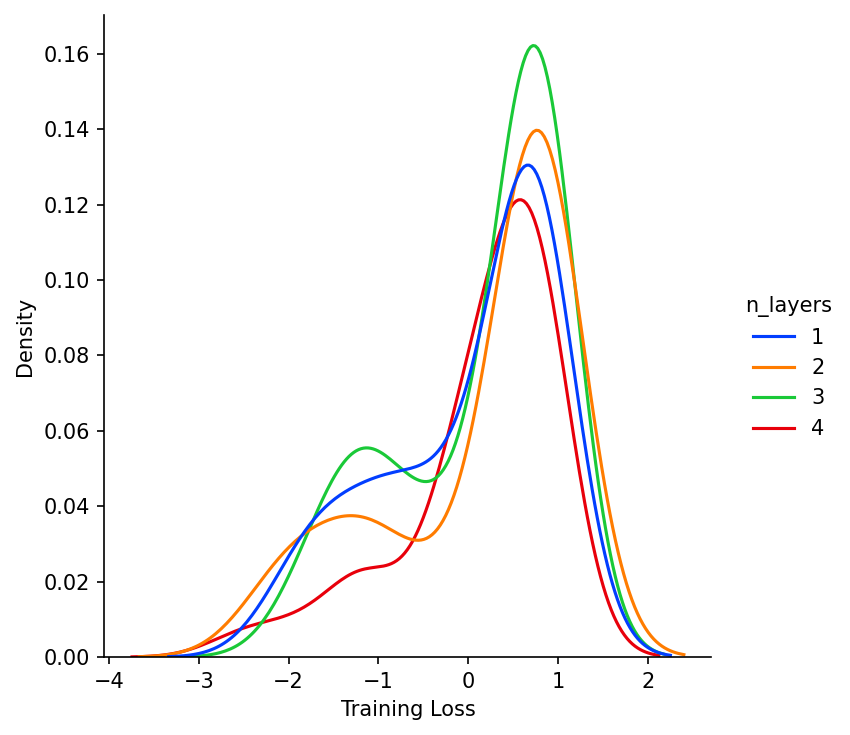

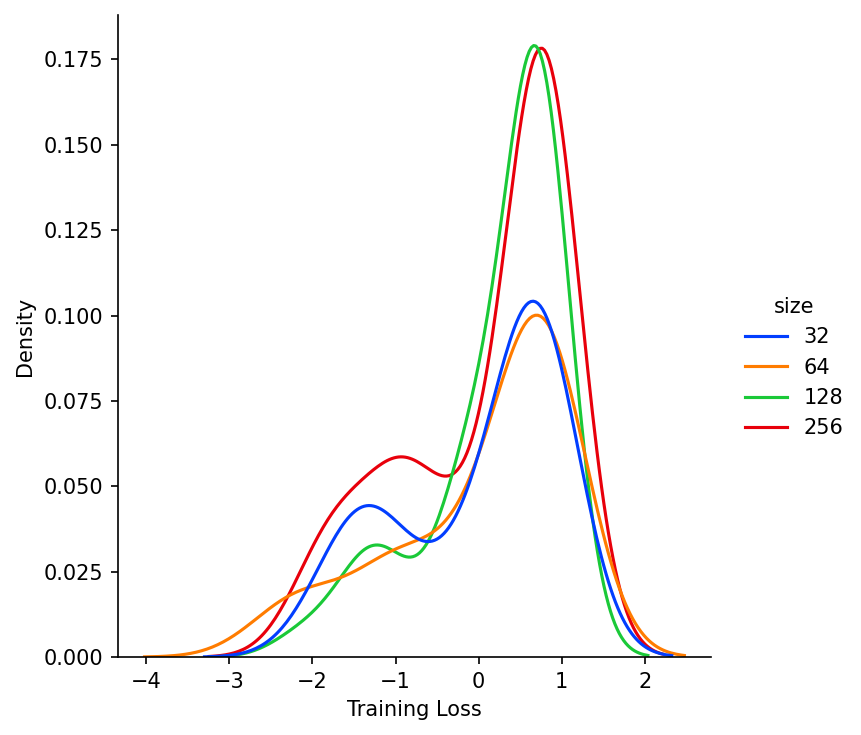

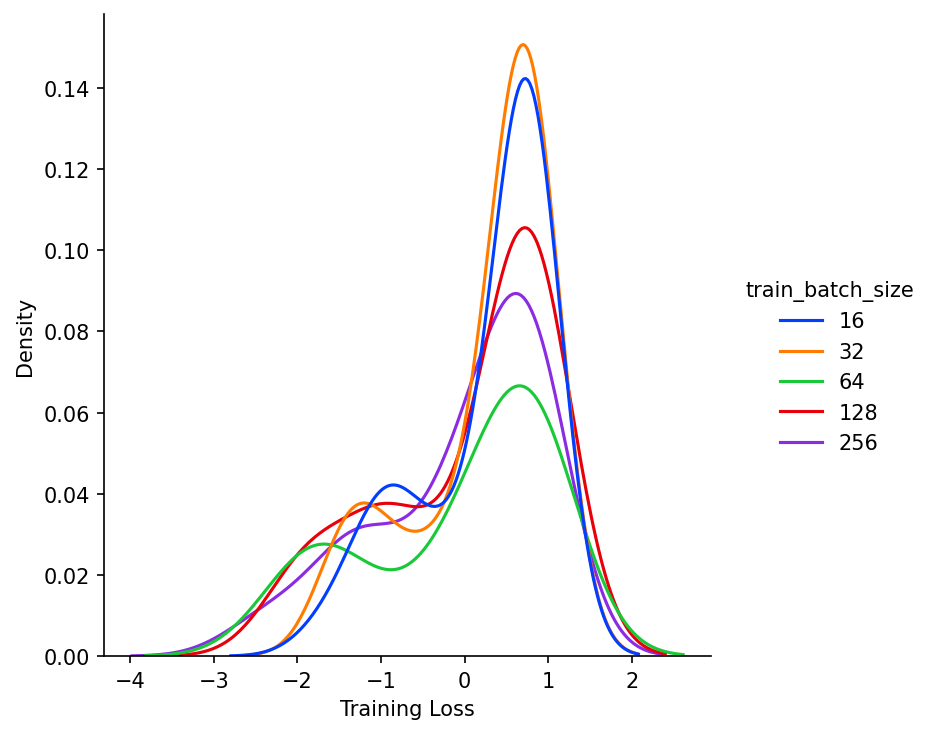

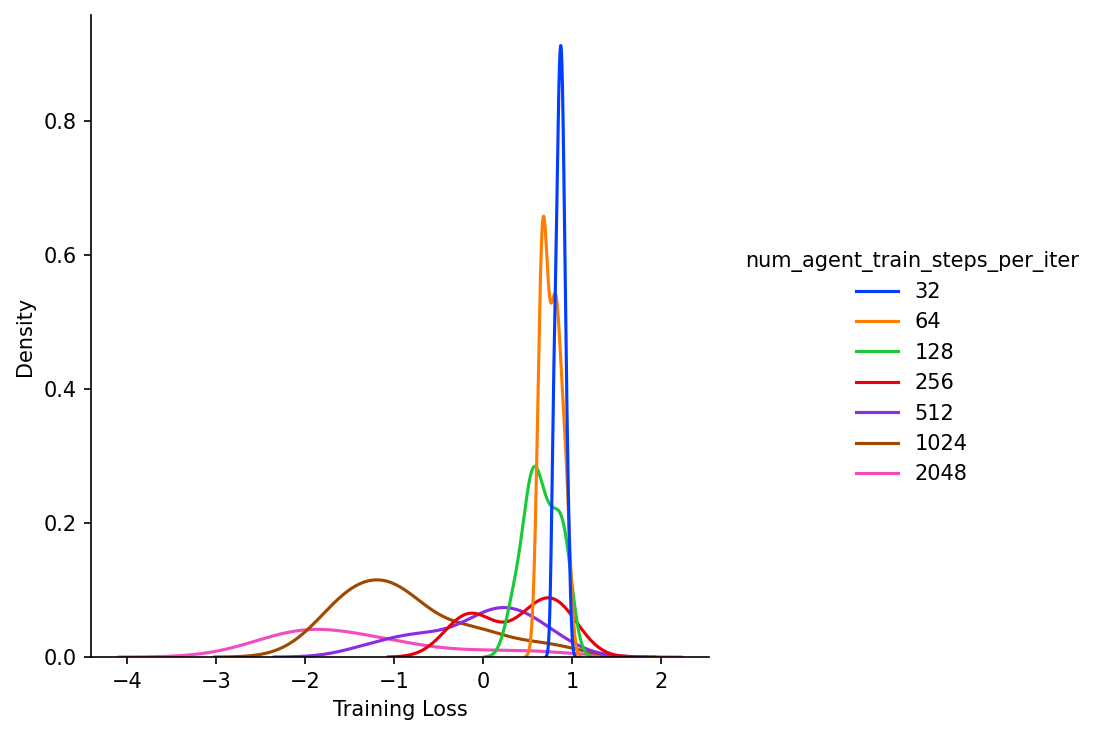

In [15]:
for feature in cat_hyper_params:
    sns.displot(data=df, x='Training Loss', hue=feature, 
             palette=sns.color_palette('bright'), kind='kde')

/tmp/ipykernel_3207270/1588876829.py:2: UserWarning: The palette list has more values (10) than needed (6), which may not be intended.
  sns.displot(data=df, x='Eval_AverageReturn', hue=feature,
/tmp/ipykernel_3207270/1588876829.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(data=df, x='Eval_AverageReturn', hue=feature,
/tmp/ipykernel_3207270/1588876829.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(data=df, x='Eval_AverageReturn', hue=feature,
/tmp/ipykernel_3207270/1588876829.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.displot(data=df, x='Eval_AverageReturn', hue=feature,
/tmp/ipykernel_3207270/1588876829.py:2: UserWarning: The palette list has more values (10) than needed (7), which may not be intended.
  sns.displot(data=df, x='Eval_AverageReturn', hue=feature,


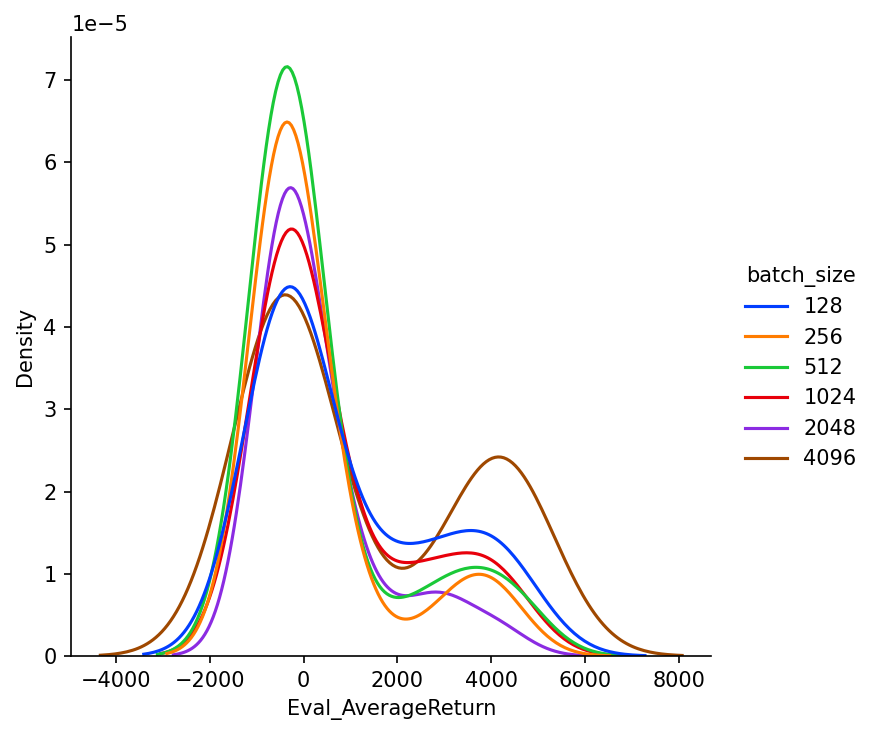

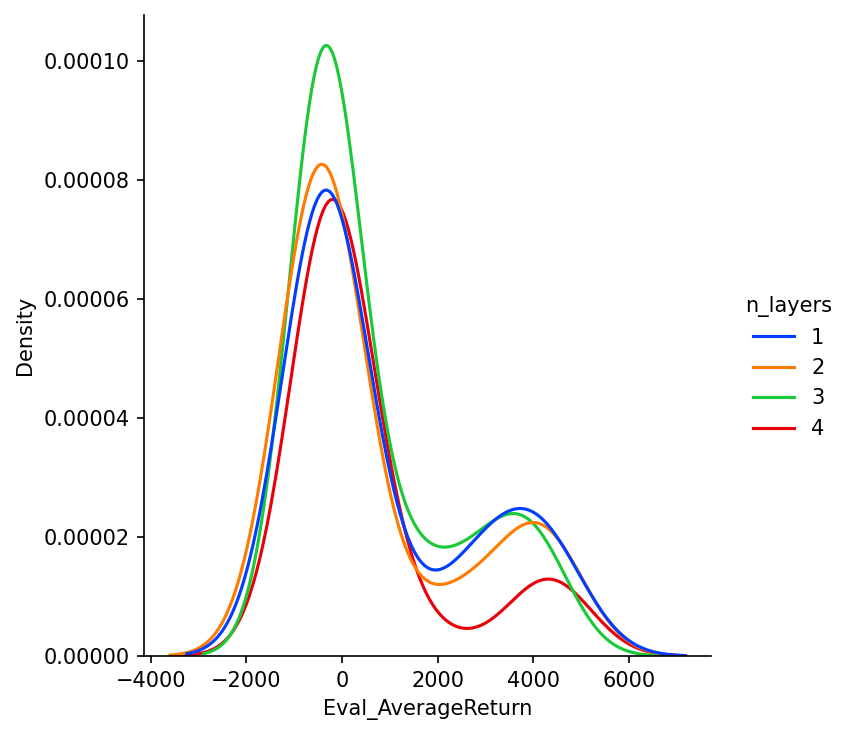

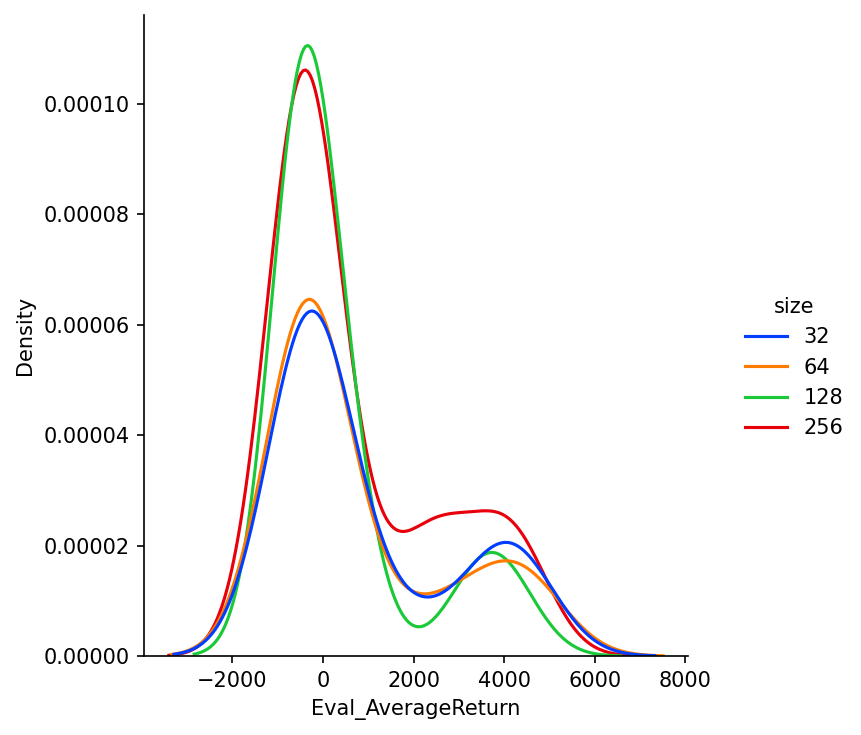

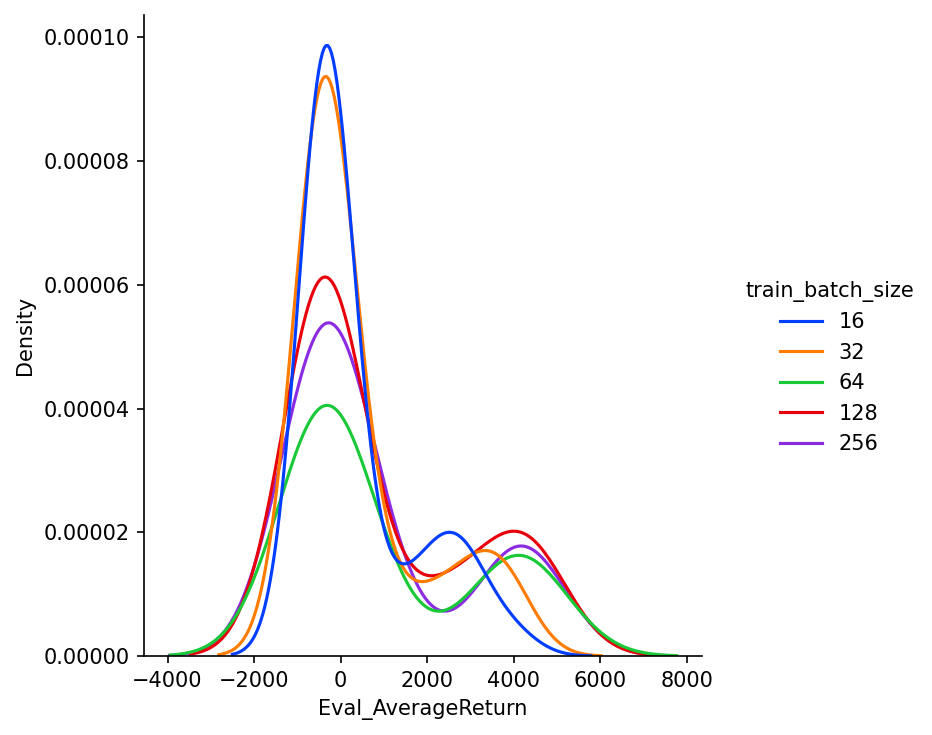

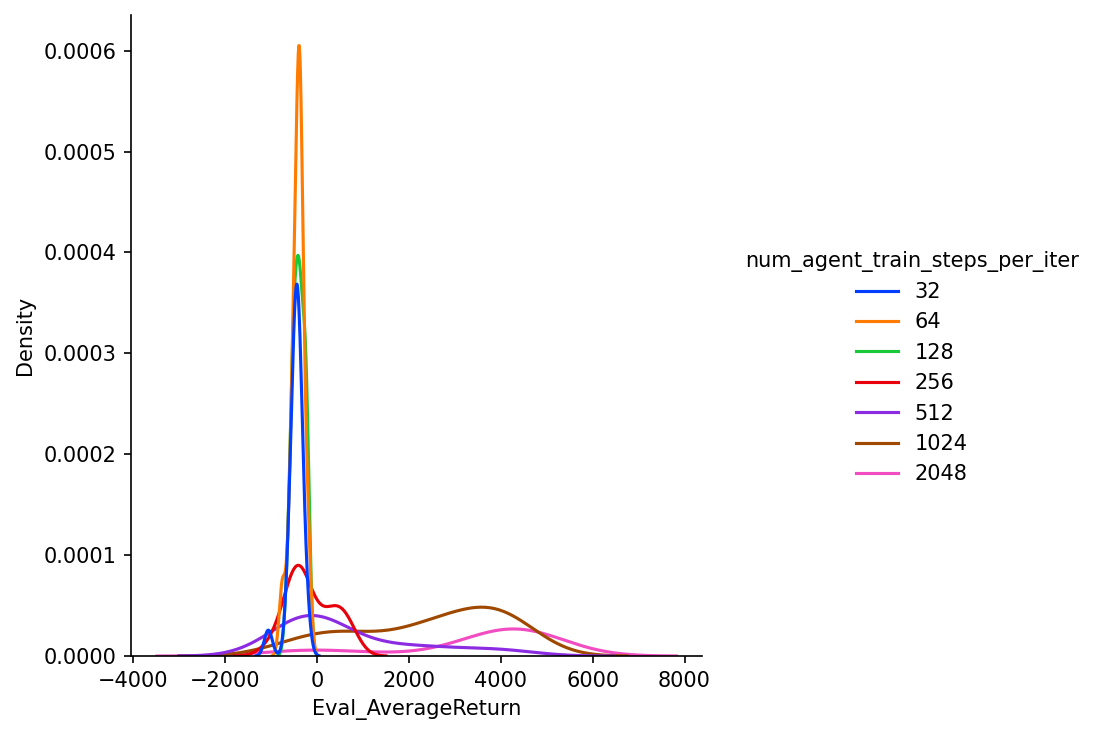

In [16]:
for feature in cat_hyper_params:
    sns.displot(data=df, x='Eval_AverageReturn', hue=feature, 
             palette=sns.color_palette('bright'), kind='kde')

/tmp/ipykernel_3207270/1663184610.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='Training Loss', y='learning_rate',


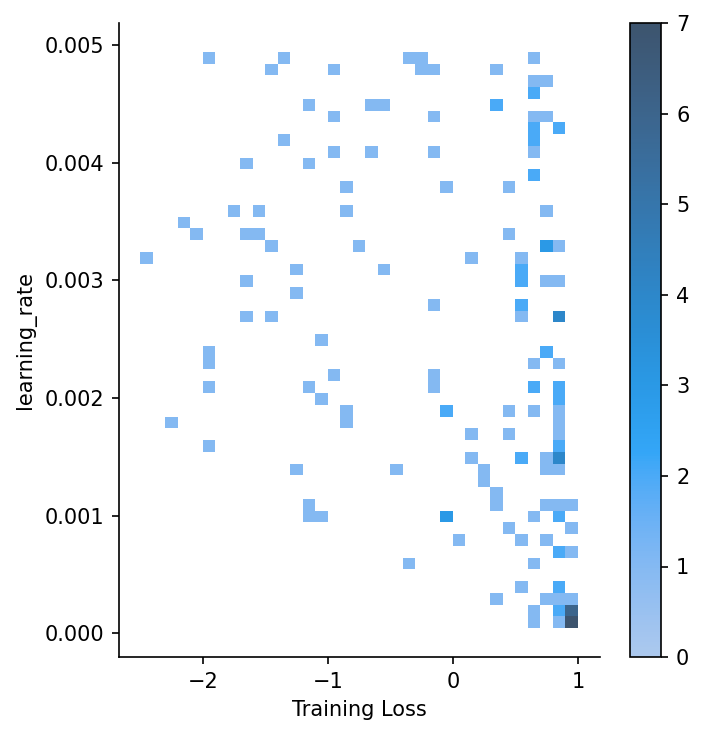

In [17]:
sns.displot(data=df, x='Training Loss', y='learning_rate', 
            palette=sns.color_palette("coolwarm", as_cmap=True), 
            binwidth=(0.1, .0001), cbar=True)

In [18]:
df[df['Training Loss'] == df['Training Loss'].min()]['id']

0    q1_tune_ant_Ant-v4_15-09-2022_13-58-42
Name: id, dtype: object

In [19]:
plot_df = df[cat_hyper_params]
target_df = df['Training Loss']

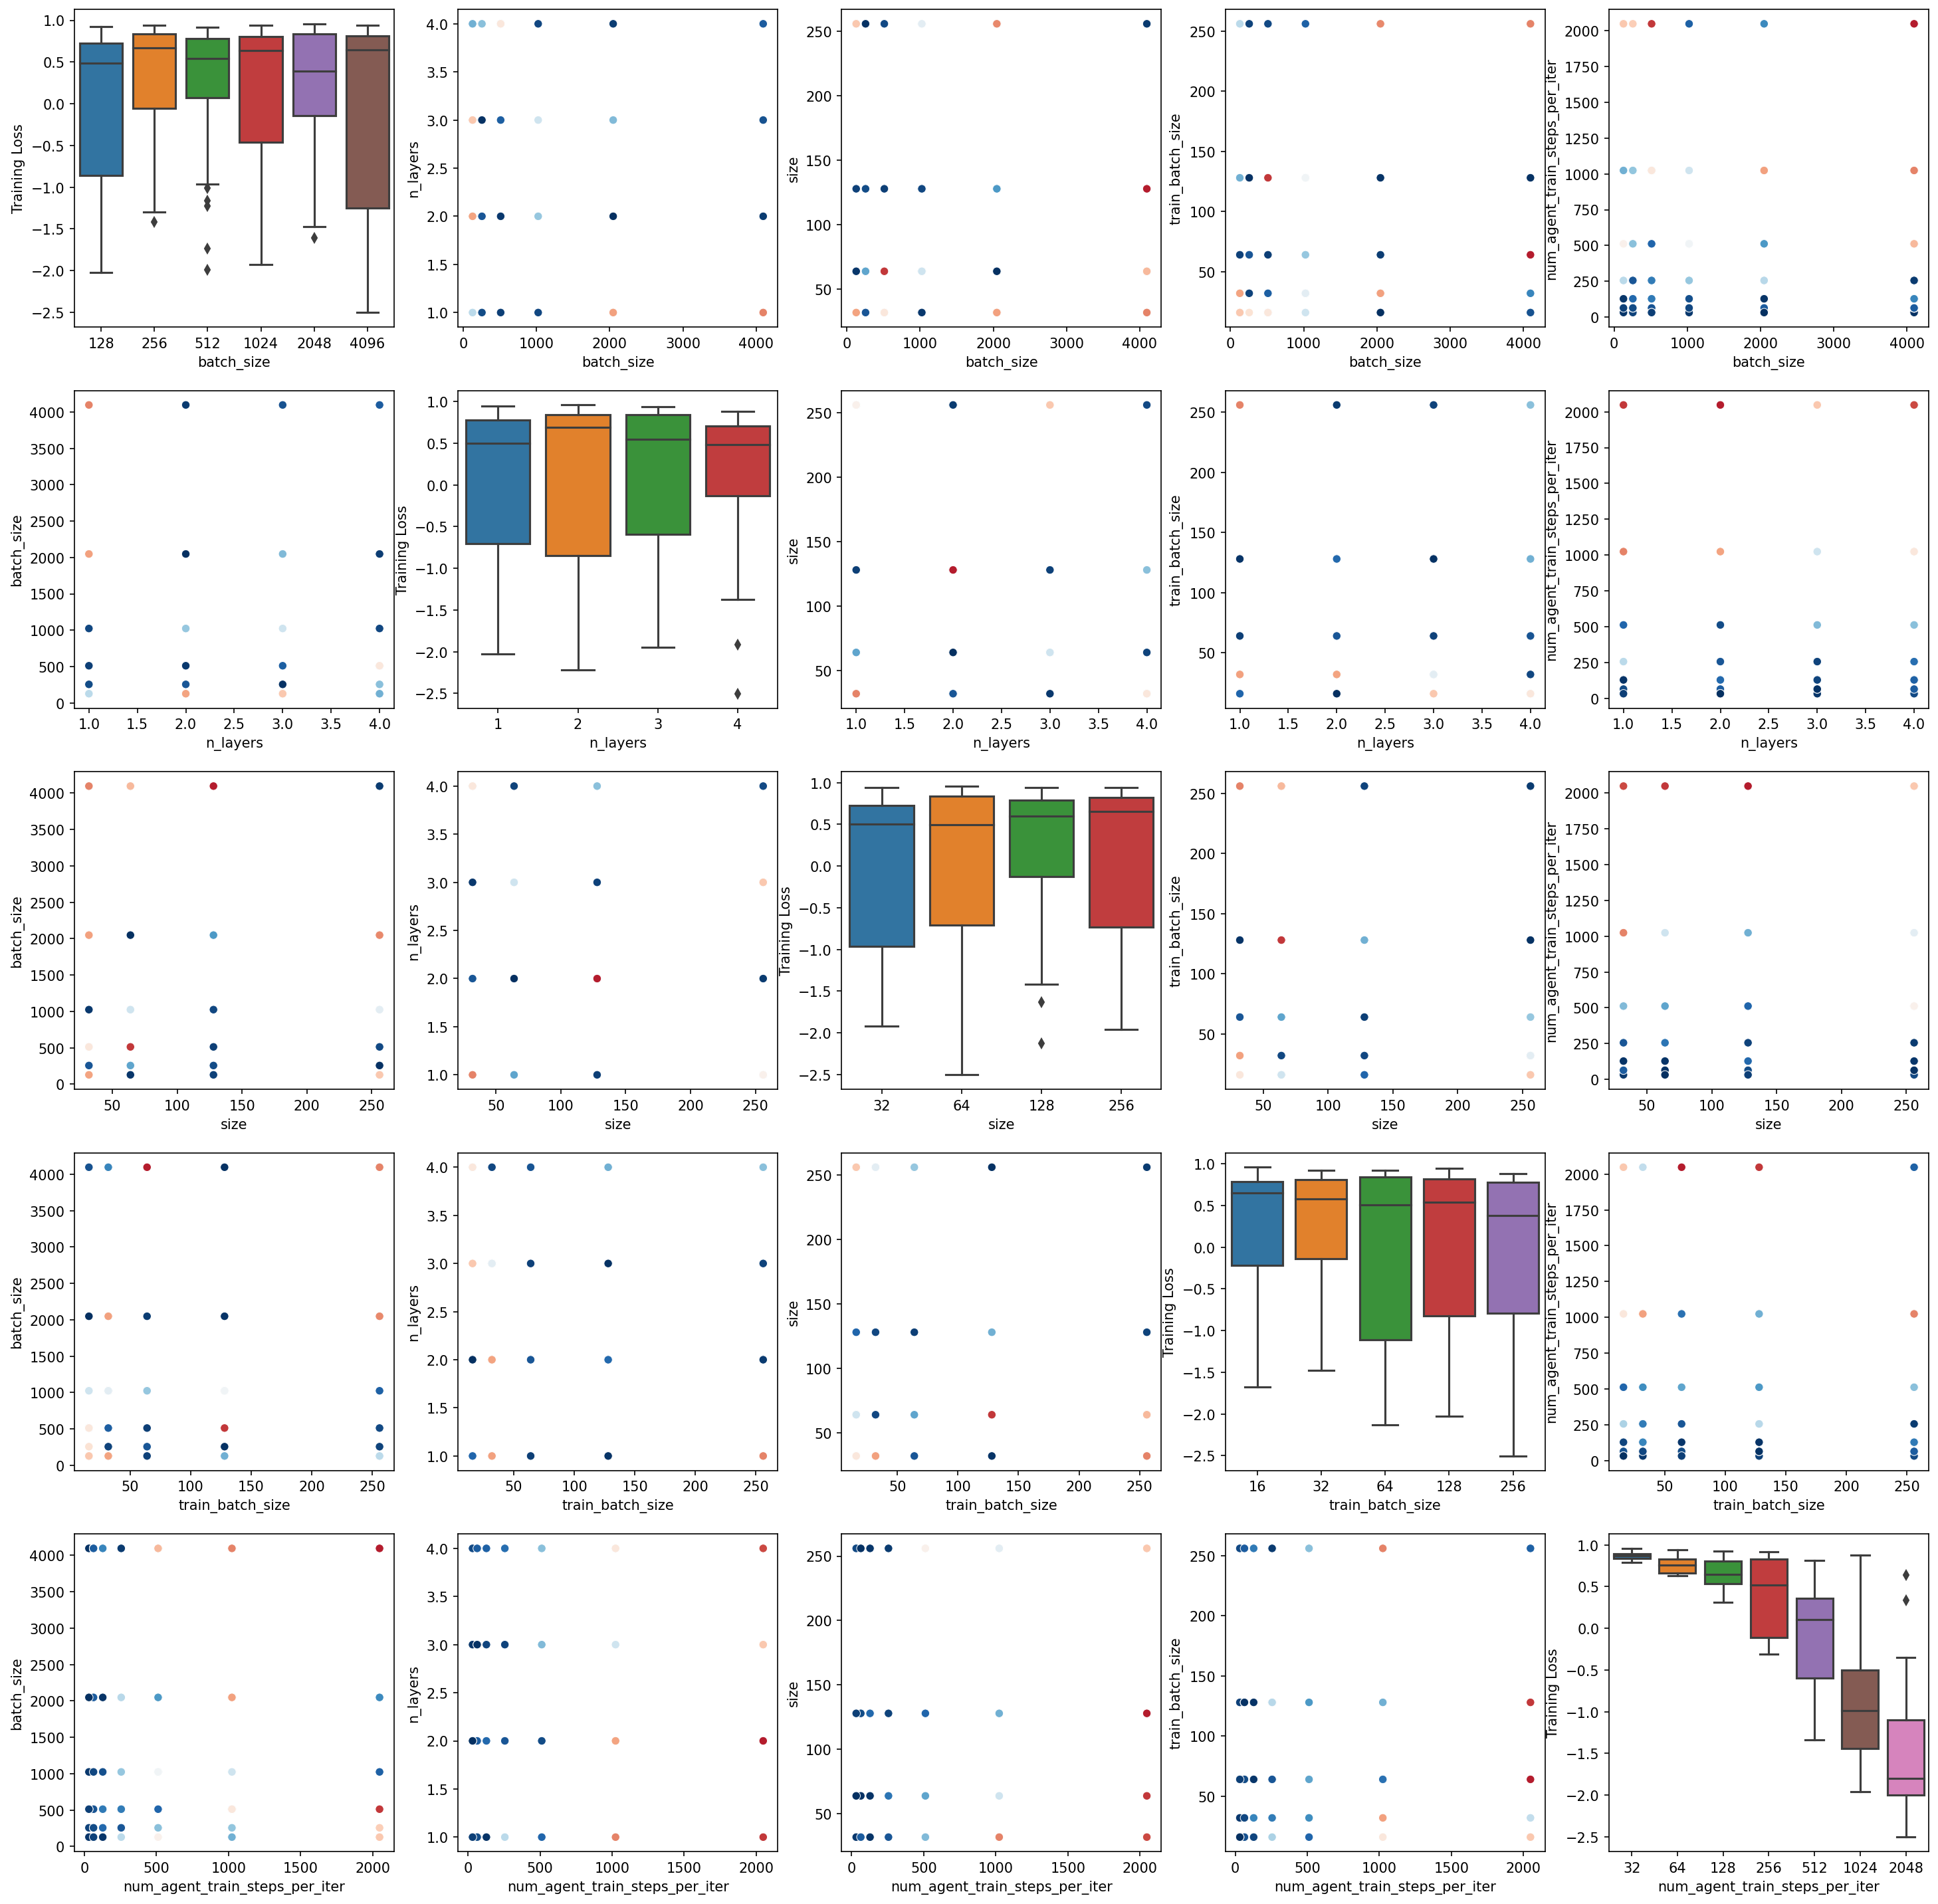

In [21]:
num_features = len(plot_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(24, 24), squeeze=True)
for idx, i in enumerate(plot_df.columns):
    for jdx, j in enumerate(plot_df.columns):
        if i == j:    # diagonal
            # sns.scatterplot(x=plot_df[i], y=plot_df[j], hue, ax=ax[idx][jdx])
            sns.boxplot(x=plot_df[i],y=target_df, 
                        ax=ax[idx][jdx],
                        )
        else:       # off diagonal
            sns.scatterplot(x=plot_df[i],y=plot_df[j], 
                            ax=ax[idx][jdx], hue=target_df, palette=sns.color_palette('RdBu', as_cmap=True),
                            legend=False)


In [22]:
df['Training Loss'].quantile(0.1)

-1.4422665000000001

In [23]:
good_runs = df[df['Training Loss'] < df['Training Loss'].quantile(0.1)]

/tmp/ipykernel_3207270/601191179.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.displot(data=good_runs, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/601191179.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(data=good_runs, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/601191179.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.displot(data=good_runs, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/601191179.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.displot(data=good_runs, x='Training Loss', hue=feature,
/tmp/ipykernel_3207270/601191179.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=good_runs, x='Training Loss', hue=feature,

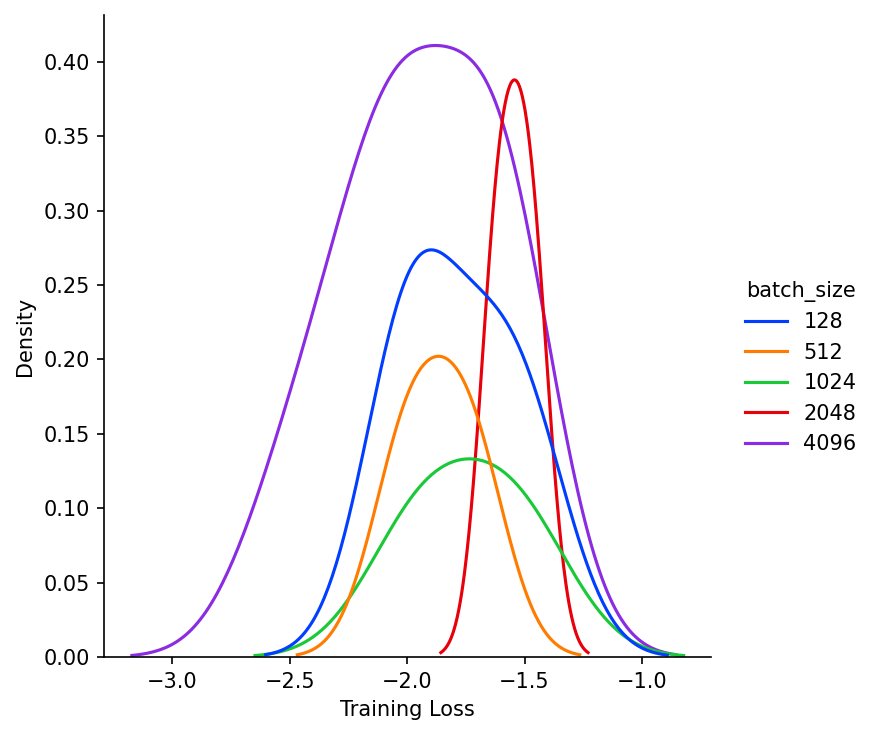

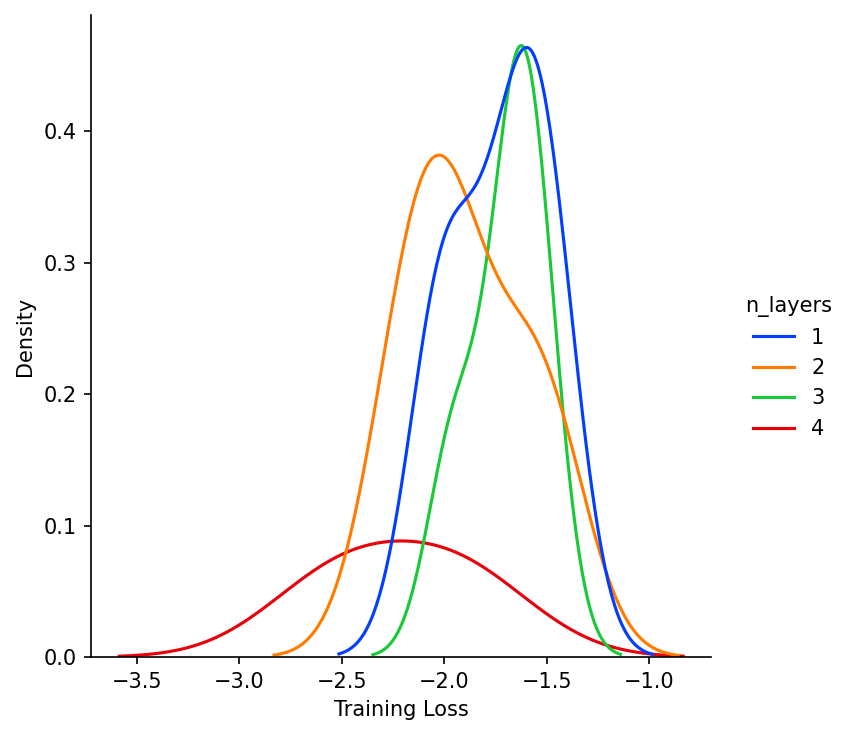

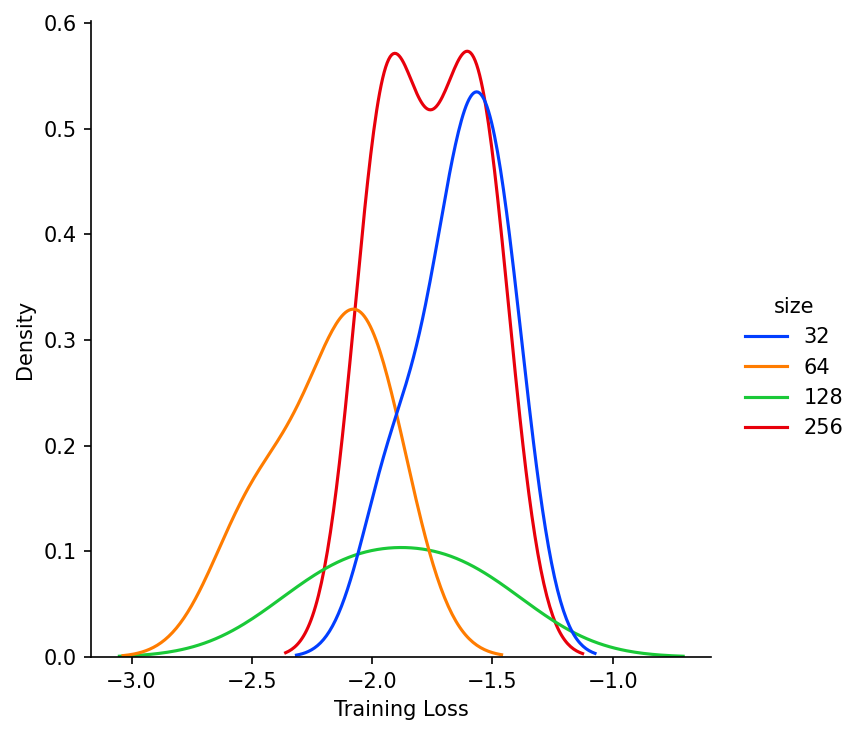

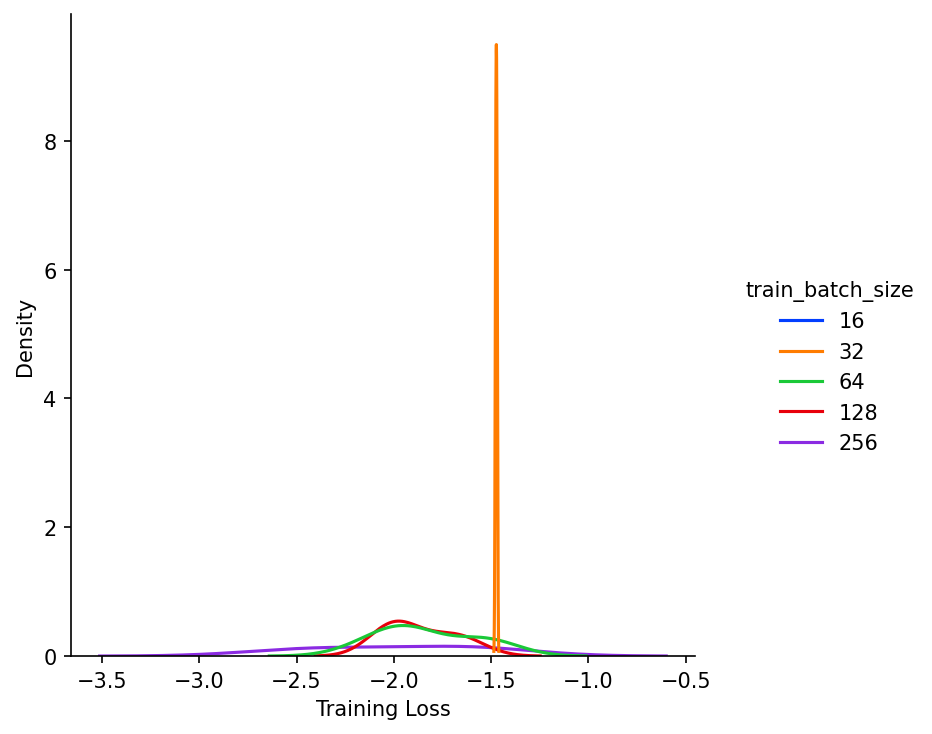

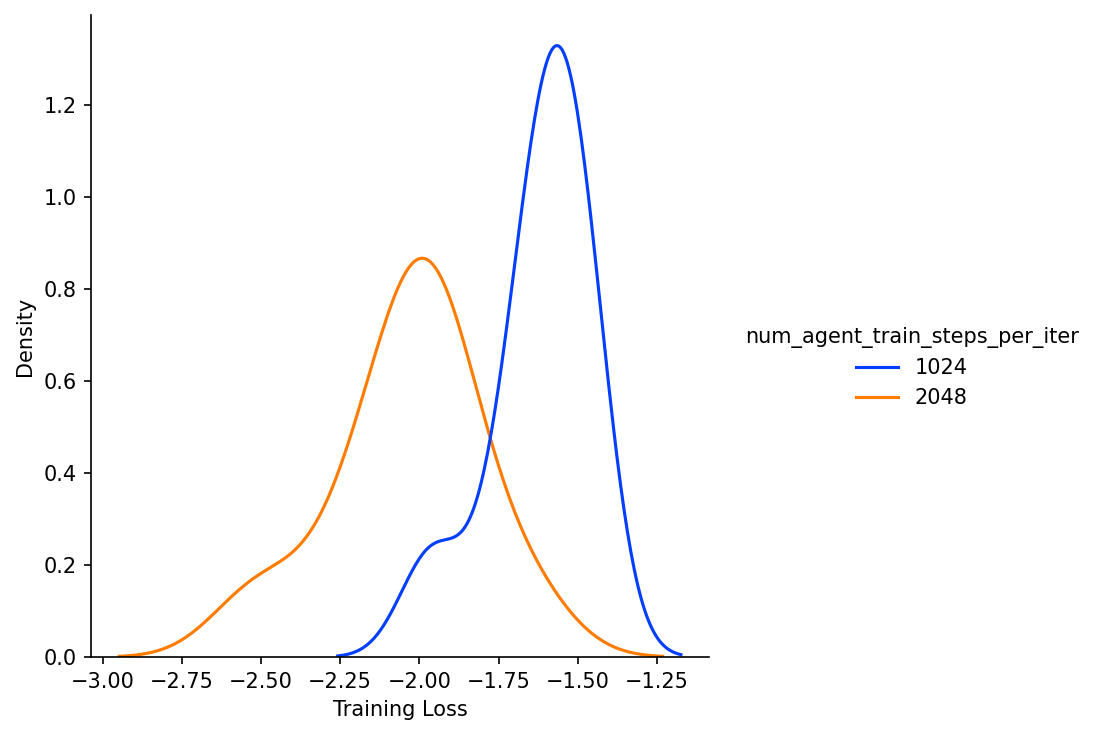

In [24]:
for feature in cat_hyper_params:
    sns.displot(data=good_runs, x='Training Loss', hue=feature, 
             palette=sns.color_palette('bright'), kind='kde')

In [25]:
plot_df = good_runs[cat_hyper_params]
target_df = good_runs['Training Loss']

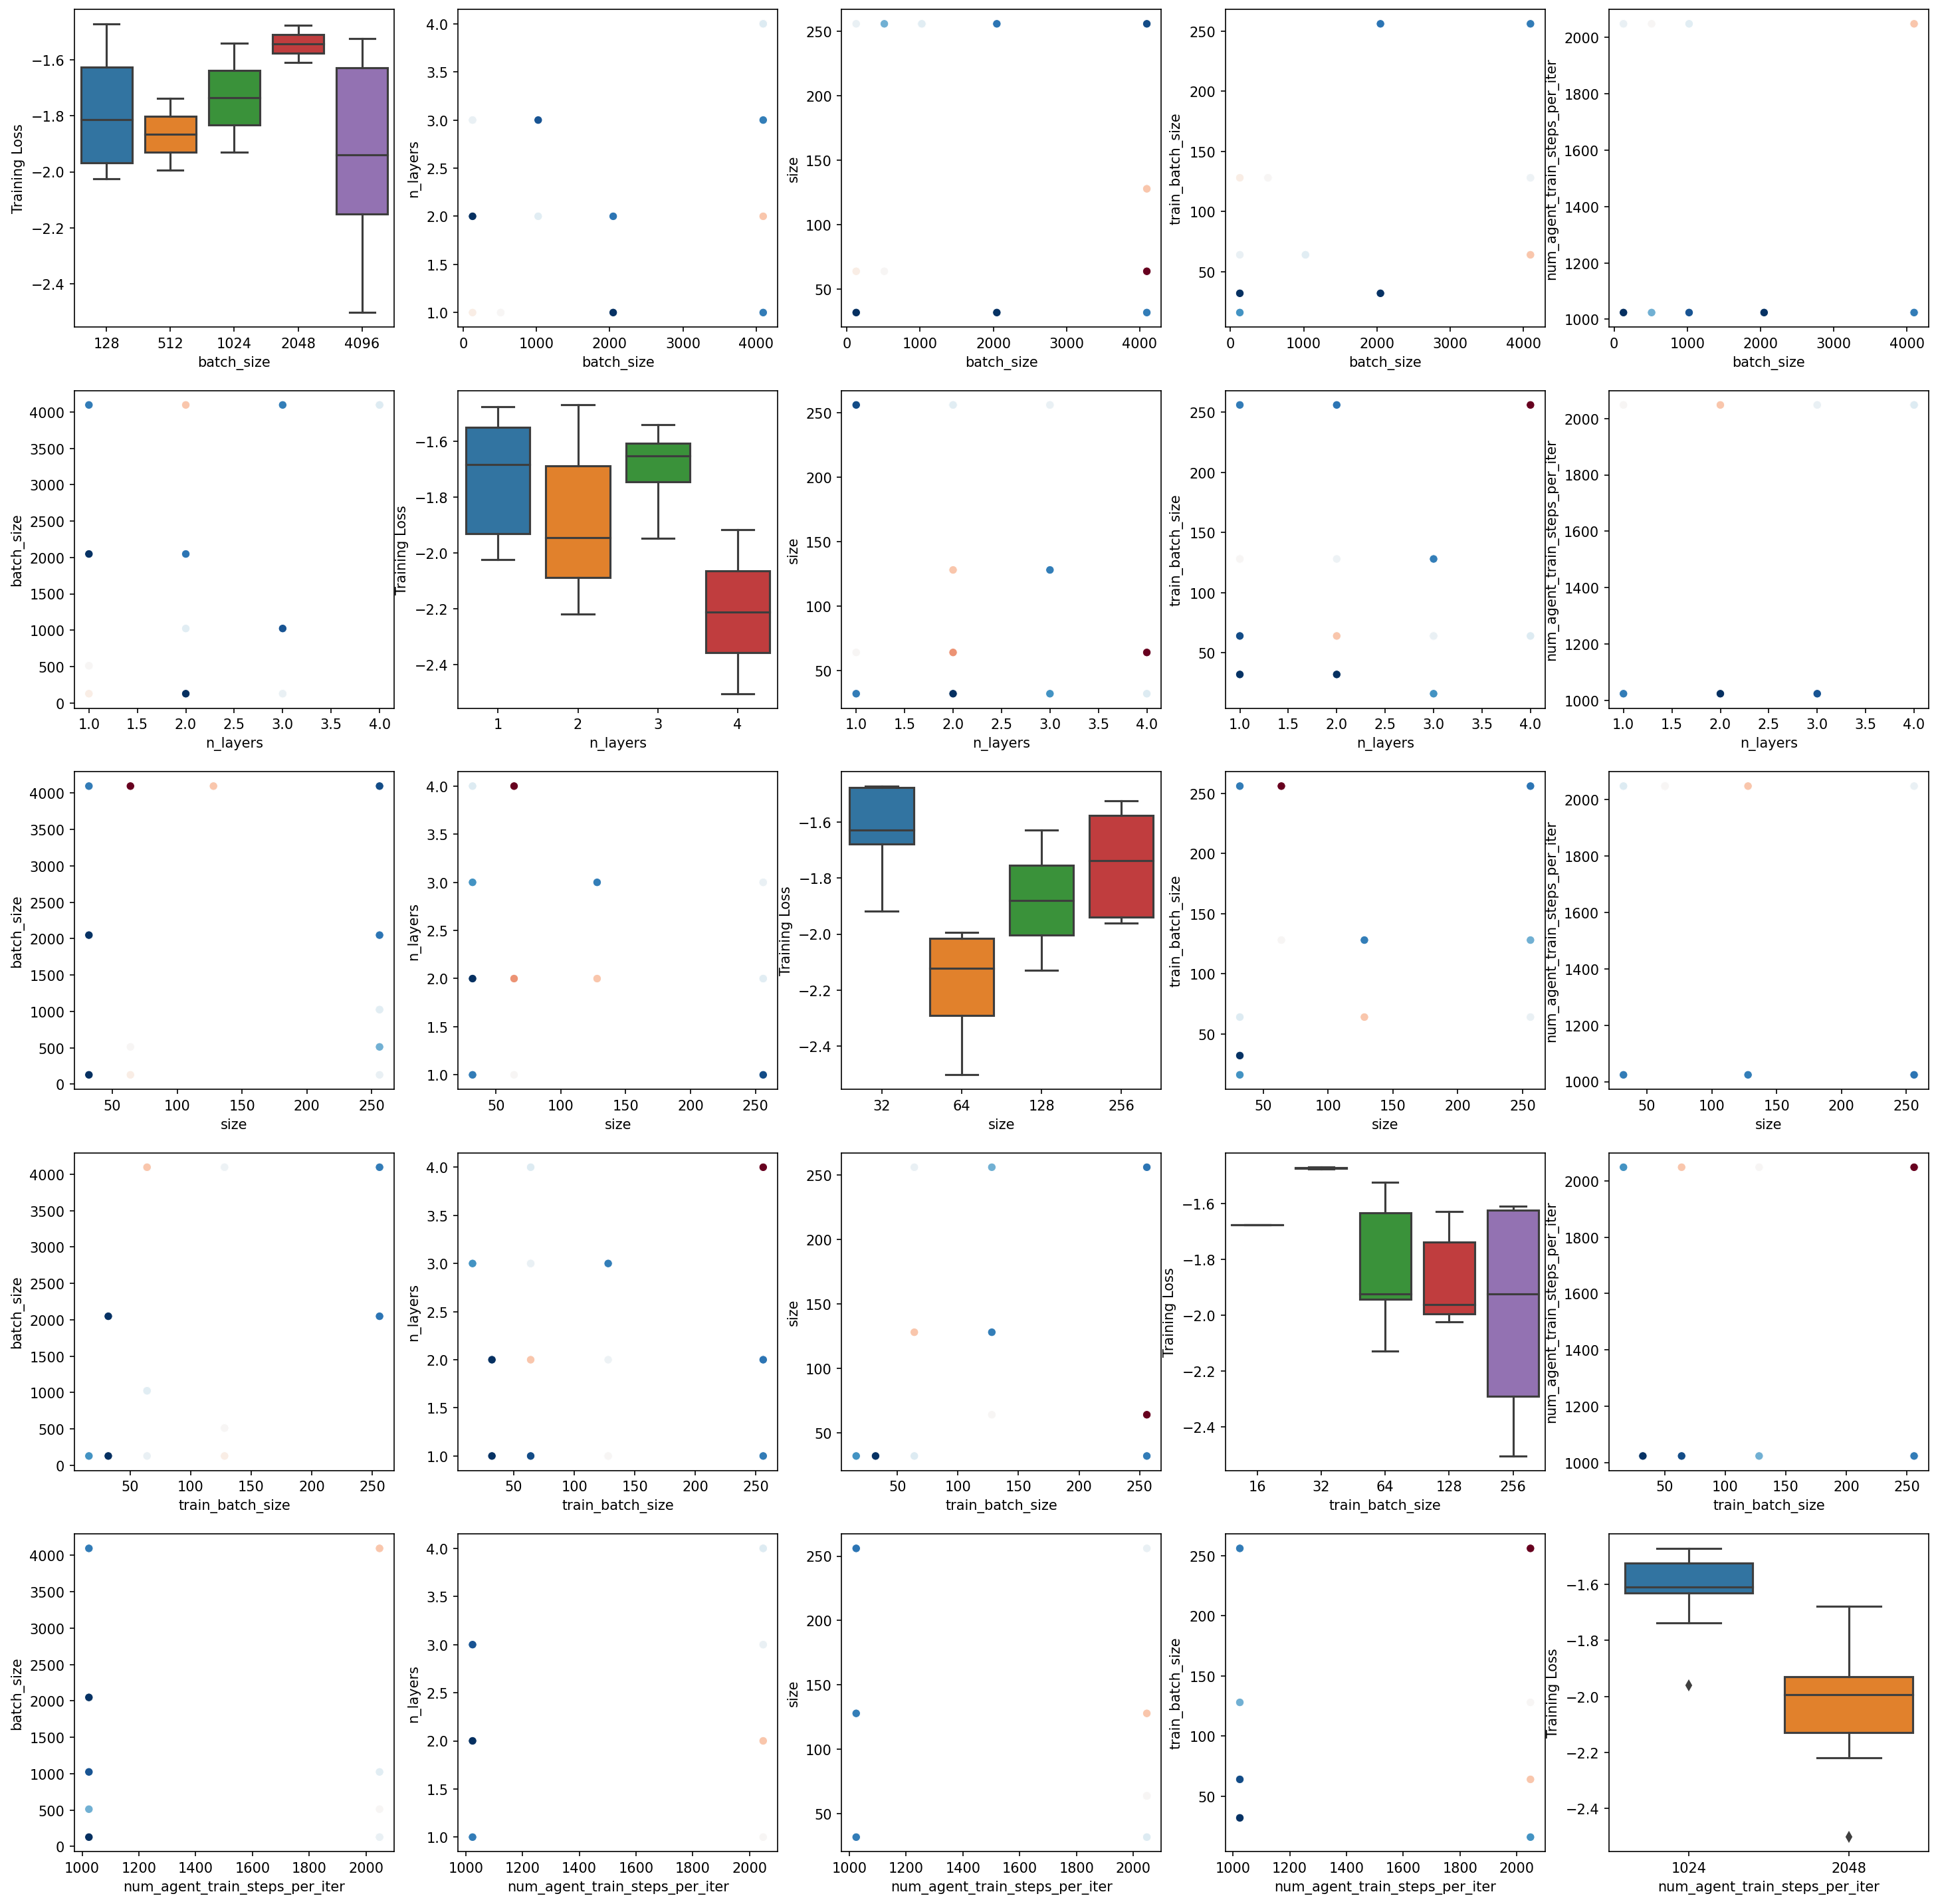

In [27]:
num_features = len(plot_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(24, 24), squeeze=True)
for idx, i in enumerate(plot_df.columns):
    for jdx, j in enumerate(plot_df.columns):
        if i == j:    # diagonal
            # sns.scatterplot(x=plot_df[i], y=plot_df[j], hue, ax=ax[idx][jdx])
            sns.boxplot(x=plot_df[i],y=target_df, 
                        ax=ax[idx][jdx],
                        )
        else:       # off diagonal
            subax = sns.scatterplot(x=plot_df[i],y=plot_df[j], 
                            ax=ax[idx][jdx], hue=target_df, palette='RdBu',
                            legend=False)
            
#             if idx == len(plot_df.columns) - 1 and jdx == len(plot_df.columns) - 2:
#                 norm = plt.Normalize(target_df.min(), target_df.max())
#                 sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
#                 sm.set_array([])

#                 # Remove the legend and add a colorbar
#                 # ax.get_legend().remove()
#                 subax.figure.colorbar(sm)


## Evaluating the best model's performance

### Best config extraction

In [47]:
df[df['Training Loss'] == df['Training Loss'].min()].to_dict(orient='records')

[{'Eval_AverageReturn': 233.91992,
  'Eval_StdReturn': 26.759785,
  'Eval_MaxReturn': 258.68604,
  'Eval_MinReturn': 172.2258,
  'Eval_AverageEpLen': 64.0,
  'Train_AverageReturn': 4713.6533,
  'Train_StdReturn': 12.196533,
  'Train_MaxReturn': 4725.8496,
  'Train_MinReturn': 4701.4565,
  'Train_AverageEpLen': 1000.0,
  'Train_EnvstepsSoFar': 0,
  'TimeSinceStart': 6.117839097976685,
  'Training Loss': -2.5895429,
  'Initial_DataCollection_AverageReturn': 4713.6533,
  'id': 'q1_tune_ant_Ant-v4_14-09-2022_18-52-09',
  'expert_policy_file': 'cs285/policies/experts/Ant.pkl',
  'expert_data': 'cs285/expert_data/expert_data_Ant-v4.pkl',
  'env_name': 'Ant-v4',
  'exp_name': 'tune_ant',
  'do_dagger': False,
  'ep_len': 64,
  'num_agent_train_steps_per_iter': 2048,
  'n_iter': 1,
  'batch_size': 128,
  'eval_batch_size': 512,
  'train_batch_size': 256,
  'n_layers': 2,
  'size': 256,
  'learning_rate': 0.003590136901955216,
  'video_log_freq': -1,
  'scalar_log_freq': 1,
  'no_gpu': False,
 

In [48]:
!pwd

/home/mohsen/projects/cs285/homework_fall2022/hw1


In [63]:
!MUJOCO_GL="egl" python -m cs285.scripts.run_hw1 --expert_policy_file cs285/policies/experts/Ant.pkl --env_name Ant-v4 --exp_name bc_ant_best --n_iter 1 --expert_data cs285/expert_data/expert_data_Ant-v4.pkl --video_log_freq 1 --size 256 --n_layers 2 --train_batch_size 256 --ep_len 64 --batch_size 128 --learning_rate 0.003590136901955216 --num_agent_train_steps_per_iter 2048 --save_params

########################
logging outputs to  /home/mohsen/projects/cs285/homework_fall2022/hw1/cs285/scripts/../../data/q1_bc_ant_best_Ant-v4_15-09-2022_12-59-55
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...
None

Eval_AverageReturn : 218.16937255859375
Eval_StdReturn : 29.501937866210938
Eval_MaxReturn : 277.23779296875
Eval_MinReturn : 173.00059509277344
Eval_AverageEpLen : 64.0
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 11.20196270942688
Training Loss : -2.6424214839935303
Initial_DataCollection_AverageReturn : 4713.6533203125
Done logging...



Saving agent params
